In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from scipy.stats import kurtosis
from scipy.stats import skew
import csv

import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [4]:
# Change this cell to the easiest way to load the dataset

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

df = pd.read_csv("/content/drive/My Drive/EE461P_Project/Data.csv")
df.head(5)

Mounted at /content/drive


,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,roloff_std,roloff_kurtosis,roloff_skew,flux_max,flux_min,flux_mean,flux_std,flux_kurtosis,flux_skew,rmse_max,rmse_min,rmse_mean,rmse_std,rmse_kurtosis,rmse_skew,zcr_max,zcr_min,zcr_mean,zcr_std,zcr_kurtosis,zcr_skew,contrast_max,contrast_min,contrast_mean,contrast_std,contrast_kurtosis,contrast_skew,bandwidth_max,bandwidth_min,bandwidth_mean,bandwidth_std,...,mfcc_6_kurtosis,mfcc_6_skew,mfcc_7_max,mfcc_7_min,mfcc_7_mean,mfcc_7_std,mfcc_7_kurtosis,mfcc_7_skew,mfcc_8_max,mfcc_8_min,mfcc_8_mean,mfcc_8_std,mfcc_8_kurtosis,mfcc_8_skew,mfcc_9_max,mfcc_9_min,mfcc_9_mean,mfcc_9_std,mfcc_9_kurtosis,mfcc_9_skew,mfcc_10_max,mfcc_10_min,mfcc_10_mean,mfcc_10_std,mfcc_10_kurtosis,mfcc_10_skew,mfcc_11_max,mfcc_11_min,mfcc_11_mean,mfcc_11_std,mfcc_11_kurtosis,mfcc_11_skew,mfcc_12_max,mfcc_12_min,mfcc_12_mean,mfcc_12_std,mfcc_12_kurtosis,mfcc_12_skew,tempo,genre
0,4031.364538,1027.079258,1784.420446,360.263361,5.246790,1.537974,7644.287109,1830.322266,3806.485316,949.558806,1.507485,1.011686,10.981944,0.0,1.391008,1.481524,5.030479,2.113917,0.324014,0.022933,0.130225,0.053187,-0.032982,0.503164,0.242676,0.033203,0.083066,0.027690,3.904819,1.428553,48.289165,4.028252,20.530733,8.761009,1.002488,1.393933,3220.590296,1306.709966,2002.650192,293.081963,...,-0.044964,0.022212,43.634895,-10.577637,15.344631,8.305549,-0.042878,0.040176,13.907670,-38.793354,-12.285267,9.061618,-0.368435,-0.202331,39.424347,-14.338533,10.980492,7.963517,0.339515,0.126730,15.191152,-33.125565,-8.324325,7.862141,-0.179061,0.002401,31.242996,-12.483559,8.810669,7.157400,-0.189109,-0.110339,22.482096,-26.569305,-3.667368,6.422199,0.313302,-0.037197,123.046875,blues
1,5444.293577,421.091729,1529.835316,613.175361,4.028086,1.339397,8085.717773,333.764648,3548.820207,1725.249654,-0.647548,0.447830,17.791128,0.0,1.444008,1.996799,12.743418,3.142622,0.271687,0.004361,0.095918,0.048718,-0.058206,0.299131,0.323730,0.006348,0.056044,0.038059,9.193445,2.362931,48.775996,5.534489,20.676334,8.239387,1.531287,1.428818,3402.554398,1046.389224,2038.617579,462.379133,...,-0.036739,-0.257875,57.322296,-14.032225,23.358673,11.936523,-0.051591,0.107448,21.894630,-52.369705,-10.103617,12.894725,-0.527936,0.009104,40.404282,-29.546383,11.903745,10.219956,0.305566,-0.183417,24.502064,-37.257187,-5.560388,10.262492,0.172146,0.013335,37.242592,-25.349421,5.376803,9.812361,0.054884,0.154526,19.230034,-27.189579,-2.239120,8.055376,-0.182963,0.004210,107.666016,blues
2,4669.770713,417.254802,1552.481958,395.634070,11.609763,1.930126,6556.860352,441.430664,3040.514948,884.938380,0.874197,0.613992,14.719387,0.0,1.638258,1.950675,8.131657,2.490637,0.326591,0.039753,0.175573,0.052423,-0.368472,0.220822,0.440918,0.012695,0.076301,0.031738,37.723069,4.185323,67.980056,4.558865,22.197265,8.727204,0.133514,0.939986,2662.739385,960.211956,1747.165985,275.765675,...,0.407629,0.056905,34.020233,-31.285770,11.629271,10.323797,1.380379,-0.974517,29.949429,-34.671497,-11.780589,8.098292,1.932035,0.884382,31.050621,-33.708015,9.706443,8.235600,2.533789,-0.926742,13.120670,-45.190308,-13.123111,7.596487,0.946092,-0.139495,25.241779,-32.569252,5.789265,8.033045,0.542265,-0.682770,23.078028,-28.854303,-8.905224,7.774160,0.489465,0.710559,161.499023,blues
3,3236.442116,318.713500,1070.119953,429.532791,1.803354,1.001449,7611.987305,387.597656,2185.028454,1222.395194,1.608416,1.245734,14.619911,0.0,1.247379,1.750351,12.675188,3.203631,0.383715,0.009310,0.141191,0.079617,-0.381391,0.525917,0.145020,0.006348,0.033309,0.020569,2.017897,1.072661,53.952526,5.438508,21.428764,7.962859,-0.023194,0.871523,3174.579278,671.098012,1596.333948,408.119547,...,0.366743,-0.887007,30.783287,-18.335241,9.297966,9.008867,-0.251997,-0.328338,25.273712,-29.548191,-0.757742,9.601001,-0.467246,-0.325538,32.761795,-29.347542,8.149013,8.438341,1.682580,-0.656629,25.346262,-45.598274,-3.196314,10.502338,0.191070,-0.346805,40

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


Text(0.5, 1.0, 'Embedded space with LDA')

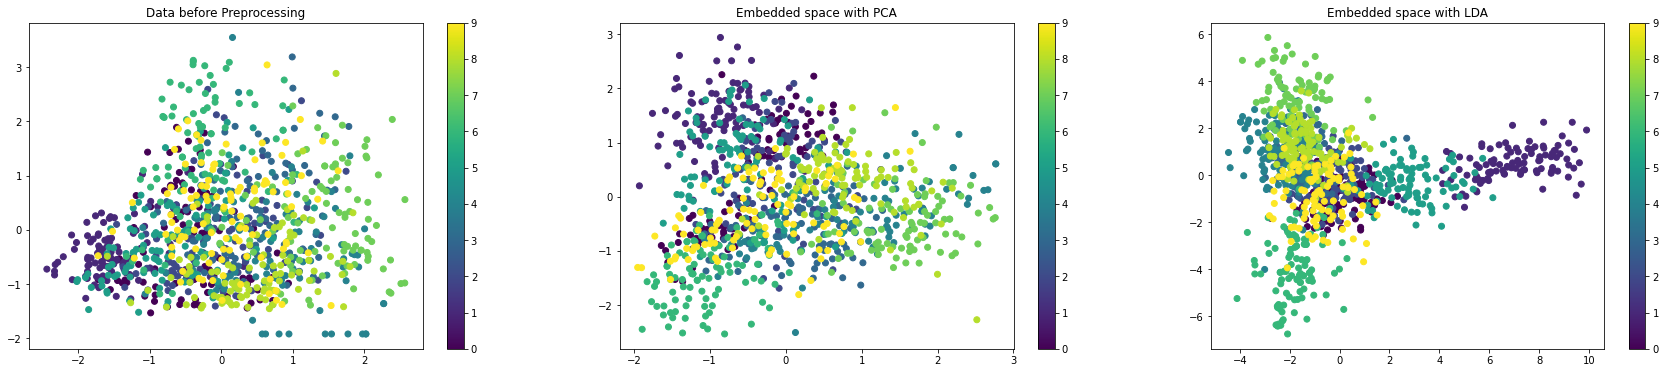

In [5]:
# Data from Dataframe
X = df.drop(['genre'], axis=1)
y = df['genre']

# Scaling X Data
scale = StandardScaler()
x_scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)

# Encoding Y Data to integer from 0-9
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

#Performing LDA
lda = LDA()
x_lda = lda.fit_transform(x_scaled, y_enc)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_enc, test_size=0.25, random_state=42)
x_train_lda, x_test_lda, y_train_lda, y_test_lda = train_test_split(x_lda, y_enc, test_size=0.25, random_state=42)

# User for iterations below
dataset = []
dataset.append([x_train, x_test, y_train, y_test])
dataset.append([x_train_lda, x_test_lda, y_train_lda, y_test_lda])
xtrain, xtest, ytrain, ytest = range(0,4)

pca = PCA(n_components=5, whiten=True)
x_pca = pca.fit_transform(x_scaled)

print(np.unique(encoder.inverse_transform(y_enc)))
plt.figure(figsize=(30, 6))
plt.subplot(131)
plt.scatter(x_scaled.iloc[:,0], x_scaled.iloc[:,1], c=y_enc)
plt.colorbar()
plt.title("Data before Preprocessing")

plt.subplot(132)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_enc)
plt.colorbar()
plt.title("Embedded space with PCA")

plt.subplot(133)
plt.scatter(x_lda[:,0], x_lda[:,1], c=y_enc)
plt.colorbar()
plt.title("Embedded space with LDA")


# x_train.shape

In [6]:
# First Model: LogisticRegression:
lr_accuracy = []
for data in dataset:
  lr = LogisticRegression(max_iter=1500, random_state=42)
  lr.fit(data[xtrain], data[ytrain])
  lr_accuracy.append(accuracy_score(data[ytest], lr.predict(data[xtest])))

print('LogisticRegression         : {0:.3f}'.format(lr_accuracy[0]))
print('LogisticRegression with LDA: {0:.3f}'.format(lr_accuracy[1]))
print('LDA resulted in a {0:.3f} point increase ({1:.2%}).'.format(lr_accuracy[1]-lr_accuracy[0], (lr_accuracy[1]/lr_accuracy[0])-1))

LogisticRegression         : 0.776
LogisticRegression with LDA: 0.864
LDA resulted in a 0.088 point increase (11.34%).


In [7]:
# Second Model: RandomForestClassifier
rfc_accuracy = []
for data in dataset:
  rfc = RandomForestClassifier(random_state=42)
  rfc.fit(data[xtrain], data[ytrain])
  rfc_accuracy.append(accuracy_score(data[ytest], rfc.predict(data[xtest])))

print('RandomForestClassifier         : {0:.3f}'.format(rfc_accuracy[0]))
print('RandomForestClassifier with LDA: {0:.3f}'.format(rfc_accuracy[1]))
print('LDA resulted in a {0:.3f} point increase ({1:.2%}).'.format(rfc_accuracy[1]-rfc_accuracy[0], (rfc_accuracy[1]/rfc_accuracy[0])-1))

RandomForestClassifier         : 0.724
RandomForestClassifier with LDA: 0.852
LDA resulted in a 0.128 point increase (17.68%).


In [8]:
# Third Model: NaiveBayes
gnb_accuracy = []
for data in dataset:
  gnb = GaussianNB()
  gnb.fit(data[xtrain], data[ytrain])
  gnb_accuracy.append(accuracy_score(data[ytest], gnb.predict(data[xtest])))

print('NaiveBayes         : {0:.3f}'.format(gnb_accuracy[0]))
print('NaiveBayes with LDA: {0:.3f}'.format(gnb_accuracy[1]))
print('LDA resulted in a {0:.3f} point increase ({1:.2%}).'.format(gnb_accuracy[1]-gnb_accuracy[0], (gnb_accuracy[1]/gnb_accuracy[0])-1))

NaiveBayes         : 0.552
NaiveBayes with LDA: 0.880
LDA resulted in a 0.328 point increase (59.42%).


In [9]:
# Fourth Model: SGDClassifier
sgd_accuracy = []
for data in dataset:
  sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=2000, random_state=42)
  sgd.fit(data[xtrain], data[ytrain])
  sgd_accuracy.append(accuracy_score(data[ytest], sgd.predict(data[xtest])))

print('SGDClassifier         : {0:.3f}'.format(sgd_accuracy[0]))
print('SGDClassifier with LDA: {0:.3f}'.format(sgd_accuracy[1]))
print('LDA resulted in a {0:.3f} point increase ({1:.2%}).'.format(sgd_accuracy[1]-sgd_accuracy[0], (sgd_accuracy[1]/sgd_accuracy[0])-1))

SGDClassifier         : 0.728
SGDClassifier with LDA: 0.808
LDA resulted in a 0.080 point increase (10.99%).


In [10]:
# Final Model: TerasSequential
epochs = 20
batch_size = 64 # On average the best

seq_history = []
seq_accuracy = []
for data in dataset:
  seq = Sequential()
  seq.add(Dense(512, activation='relu', input_shape=(data[xtrain].shape[1],)))
  seq.add(Dense(256, activation='relu'))
  seq.add(Dense(128, activation='relu'))
  seq.add(Dense(64, activation='relu'))
  seq.add(Dense(10, activation='softmax'))

  seq.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = seq.fit(data[xtrain], data[ytrain], epochs=epochs, batch_size=batch_size, validation_data=(data[xtest], data[ytest]), verbose=0)
  seq_history.append(history)
  test_loss, test_acc = seq.evaluate(data[xtest], data[ytest], verbose=0)
  seq_accuracy.append(test_acc)
  # print(accuracy_score(data[ytest], seq.pre(data[xtest])))

print('TerasSequential         : {0:.3f} (~0.74-0.77 on average)'.format(seq_accuracy[0]))
print('TerasSequential with LDA: {0:.3f} (~0.84-0.87 on average)'.format(seq_accuracy[1]))
print('LDA resulted in a {0:.3f} point increase ({1:.2%}) (~7-17% on average)'.format(seq_accuracy[1]-seq_accuracy[0], (seq_accuracy[1]/seq_accuracy[0])-1))


TerasSequential         : 0.752 (~0.74-0.77 on average)
TerasSequential with LDA: 0.844 (~0.84-0.87 on average)
LDA resulted in a 0.092 point increase (12.23%) (~7-17% on average)
